In [37]:
import os, sys, argparse
import pandas as pd
import alpaca_trade_api as tradeapi
from datetime import datetime
import backtrader as bt
from backtrader import Cerebro

In [3]:
with open("Keys/alpaca_api.txt", "r") as f:
    key_id = f.readline()
    secret_key = f.readline()

In [4]:
api = tradeapi.REST(key_id, secret_key, api_version='v2')

In [18]:
spy = api.alpha_vantage.historic_quotes('SPY', adjusted=True, output_format='pandas')
spy.columns = [' '.join(v.split()[1:]) for v in spy.columns]

In [19]:
spy.shape

(5033, 8)

In [20]:
spy.columns

Index(['open', 'high', 'low', 'close', 'adjusted close', 'volume',
       'dividend amount', 'split coefficient'],
      dtype='object')

In [21]:
spy_copy = spy.copy()

In [26]:
def moving_average(timeperiod, df):
    df = df.iloc[::-1].rolling(timeperiod).mean().iloc[::-1]
    return df

In [32]:
spy_copy['MA 50 close'] = moving_average(50, spy_copy['adjusted close'])
spy_copy['MA 200 close'] = moving_average(200, spy_copy['adjusted close'])

In [33]:
spy_copy.head()

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient,MA 50 close,MA 200 close
date,,,,,,,,,,
2020-05-13,286.06,287.19,279.61,281.2867,281.2867,80854648.0,0.0,1.0,271.145438,297.058112
2020-05-12,293.79,294.24,286.52,286.6700,286.6700,87356886.0,0.0,1.0,271.487840,297.135594
2020-05-11,290.34,294.00,289.88,292.5000,292.5000,78982891.0,0.0,1.0,271.898496,297.188868
2020-05-08,291.09,292.95,289.86,292.4400,292.4400,76446082.0,0.0,1.0,271.937518,297.203097
2020-05-07,287.75,289.78,287.13,287.6800,287.6800,74788296.0,0.0,1.0,272.002588,297.224714


In [34]:
spy_copy[spy_copy['MA 50 close'] >= spy_copy['MA 200 close']]

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient,MA 50 close,MA 200 close
date,,,,,,,,,,
2020-03-30,255.70,262.43,253.53,261.65,261.6500,171274407.0,0.0,1.0,299.754622,299.178113
2020-03-27,253.27,260.81,251.05,253.42,253.4200,223871285.0,0.0,1.0,301.099612,299.288393
2020-03-26,249.52,262.80,249.05,261.20,261.2000,256107410.0,0.0,1.0,302.554936,299.433994
2020-03-25,244.87,256.35,239.75,246.79,246.7900,297989659.0,0.0,1.0,303.839950,299.543193
2020-03-24,234.42,244.10,233.80,243.15,243.1500,233038623.0,0.0,1.0,305.423102,299.724785
...,...,...,...,...,...,...,...,...,...,...
2002-04-25,109.20,109.70,108.70,109.50,76.7869,25446400.0,0.0,1.0,79.330020,79.131343
2002-04-24,110.60,111.80,109.40,109.40,76.7167,18894900.0,0.0,1.0,79.348052,79.178192
2002-04-23,111.10,111.50,110.20,110.50,77.4881,16967000.0,0.0,1.0,79.371684,79.225393


In [40]:
cerebro = Cerebro()

In [41]:
cerebro.broker.set_cash(100000)

In [42]:
feed = bt.feeds.PandasData(dataname = spy)

In [43]:
cerebro.adddata(feed)

In [44]:
cerebro.run()

<IPython.core.display.Javascript object>


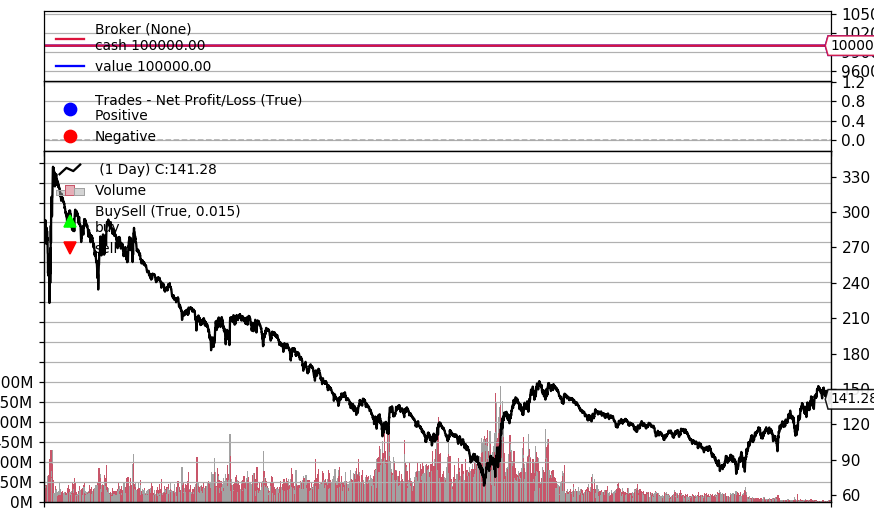

[[<Figure size 640x480 with 4 Axes>]]

In [45]:
cerebro.plot()